# Basic Analysis

## Import Libraries

In [1]:
# Custom imports
from statisco.statistics import closingReturns, mean, variance, stdDev, covariance, correlation
import matplotlib.pyplot as plt

# Foreing Libraries
import yfinance as yf
import numpy as np
import math
import pandas as pd

plt.style.use('dark_background')

In [2]:
msft = yf.download("MSFT", period="1mo")
aapl = yf.download("AAPL", period="1mo")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
msft.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-18,369.450012,373.000000,368.679993,372.649994,372.649994,21802900
2023-12-19,371.489990,373.260010,369.839996,373.260010,373.260010,20603700
2023-12-20,375.000000,376.029999,370.529999,370.619995,370.619995,26316700
2023-12-21,372.559998,374.410004,370.040009,373.540009,373.540009,17708000
2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100


## Statistics

### Close Returns

In [4]:
msft["MyCloseReturns"] = closingReturns(msft["Adj Close"])

In [5]:
aapl["MyCloseReturns"] = closingReturns(aapl["Adj Close"])

In [6]:
msft["CloseReturns"] = msft["Adj Close"].pct_change()

In [7]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns
Date,,,,,,,,
2023-12-18,369.450012,373.000000,368.679993,372.649994,372.649994,21802900,0.000000,NaN
2023-12-19,371.489990,373.260010,369.839996,373.260010,373.260010,20603700,0.001637,0.001637
2023-12-20,375.000000,376.029999,370.529999,370.619995,370.619995,26316700,-0.007073,-0.007073
2023-12-21,372.559998,374.410004,370.040009,373.540009,373.540009,17708000,0.007879,0.007879
2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100,0.002784,0.002784


### Mean

In [8]:
defaultMean = msft["MyCloseReturns"].mean()
myMean = mean(msft["MyCloseReturns"])
myMeanAapl = mean(aapl["MyCloseReturns"])

print(f"default pandas mean: {defaultMean}")
print(f"myMean: {myMean}")

default pandas mean: 0.002219977152614227
myMean: 0.002219977152614227


### Variance

In [9]:
defaultVariance = np.var(msft["MyCloseReturns"])
myVariance = variance(msft["MyCloseReturns"], myMean)
myVarianceAapl = variance(aapl["MyCloseReturns"], myMeanAapl)

print(f"default numpy variance: {defaultVariance}")
print(f"myMean: {myVariance}")

default numpy variance: 5.8966217487086904e-05
myMean: 5.896621748708689e-05


### Std Dev

In [10]:
defaultStandardDeviation = msft["MyCloseReturns"].std()
myStandardDeviation = stdDev(msft["MyCloseReturns"], myMean)
myStandardDeviationAapl = stdDev(aapl["MyCloseReturns"], myMeanAapl)

print(f"default numpy std dev: {defaultStandardDeviation}")
print(f"myStandardDeviation: {myStandardDeviation}")

default numpy std dev: 0.007889367430826869
myStandardDeviation: 0.0076789463787089235


### Covariance

In [11]:
covariance_matrix = np.cov(msft["MyCloseReturns"], aapl["MyCloseReturns"])
covariance_value = covariance_matrix[0, 1]

myCovariance = covariance(msft["MyCloseReturns"], myMean, aapl["MyCloseReturns"], myMeanAapl)

print(f"defualt covariance: {covariance_value}")
print(f"myCovariance: {myCovariance}")

defualt covariance: 7.326917668366259e-05
myCovariance: 7.326917668366259e-05


### Correlation

In [12]:
correlation_coefficient = np.corrcoef(msft["MyCloseReturns"], aapl["MyCloseReturns"])[0, 1]
myCorrelation = correlation(myCovariance, myVariance, myVarianceAapl)

In [13]:
print(f"defualt correlation: {correlation_coefficient}")
print(f"myCorrelation: {myCorrelation}")

defualt correlation: 0.834398267264059
myCorrelation: 0.8807537265565067


## Financial Calculations

In [14]:
from statisco.finance import compoundInterest, moneyMadeInAYear, compoundInterestTime, expectedValue

### Compound Interest
- **Principal**: Initial amount of money invested or loaned.
- **Interest Rate**: The percentage of the principal that is charged or paid over a certain period. An interest rate of 5% means that 5% of the principal will be added to or deducted from the principal each period.
- **Time Period**: Duration for which the money is invested or borrowed.

In [15]:
def compound_interest(principal, interest_rate, time_period):
    # Check if the inputs are valid
    if time_period < 0:
        raise ValueError("Time cannot be negative.")
    
    # Calculate compound interest using the formula A = P * (1 + r)^t
    future_value = principal * (1 + interest_rate) ** time_period
    return future_value

In [16]:
principal = 1000.0
itr = 0.05
t = 2.0
cmpi = compoundInterest(principal, itr, t)
default_cmpi = compound_interest(principal, itr, t)
print(f"compound interest: {cmpi}")
print(f"default compound interest: {default_cmpi}")

compound interest: 1102.5
default compound interest: 1102.5


### Money Made in a Year

In [17]:
def money_made_in_a_year(P_t, r_t, t_t):
    return r_t * (P_t * (1 + r_t) ** t_t)

principal = 1000.0
interest_rate = 0.05
time_period = 2.0

mmiay = moneyMadeInAYear(principal, itr, t)
default_mmiay = money_made_in_a_year(principal, itr, t)
print(f"Money Made in a Year: {mmiay}")
print(f"default money made in a year: {default_mmiay}")

Money Made in a Year: 55.125
default money made in a year: 55.125


### Compound Interest

In [18]:
def compound_interest_time(r_t):
    """
    Calculate the time it takes for compound interest to reach a factor.
    """
    return -math.log(r_t) / math.log(1 + r_t)

interest_rate = 0.05  # Example interest rate (5%)
compound_time = compound_interest_time(interest_rate)
cmpt = compoundInterestTime(interest_rate)

print(f"Default compound interest time: {compound_time} years")
print(f"cmpt: {cmpt} years")

Default compound interest time: 61.40033190195481 years
cmpt: 61.40033190195481 years


### Expected Value

In [19]:
def expected_value(avg_loss, prob_loss, avg_gain, prob_gain):return (avg_loss * prob_loss) + (avg_gain * prob_gain)

# Example usage:
avg_loss = -10.0   # Average loss amount
prob_loss = 0.3    # Probability of a loss
avg_gain = 20.0    # Average gain amount
prob_gain = 0.7    # Probability of a gain

defaultEV = expected_value(avg_loss, prob_loss, avg_gain, prob_gain)
EV = expectedValue(avg_loss, prob_loss, avg_gain, prob_gain)
print(f"Default expected value: {defaultEV} ")
print(f"expected value: {EV}")

Default expected value: 11.0 
expected value: 11.0


## Indicators

In [20]:
from statisco.indicators.MAs import SMA, EMA, WMA
from statisco.indicators.ATRs import ATR, ATRwma, ATRema

### SMA

In [21]:
def calculate_sma(data, window):
    sma = np.convolve(data, np.ones(window)/window, mode='valid')
    return sma

In [22]:
window_size = 3
msft['SMA'] = msft['Close'].rolling(window=window_size).mean()
msft['mySMA'] = SMA(msft['Close'], 3)

In [23]:
msft.tail(5)

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns,SMA,mySMA
Date,,,,,,,,,,
2024-01-09,372.010010,375.989990,371.190002,375.790009,375.790009,20830000,0.002936,0.002936,372.743337,372.743337
2024-01-10,376.369995,384.170013,376.320007,382.769989,382.769989,25514200,0.018574,0.018574,377.750000,377.750000
2024-01-11,386.000000,390.679993,380.380005,384.630005,384.630005,27850800,0.004859,0.004859,381.063334,381.063334
2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700,0.009984,0.009984,385.289998,385.289998
2024-01-16,393.660004,394.029999,387.622894,390.269989,390.269989,27135918,0.000000,0.004634,387.789998,387.789998


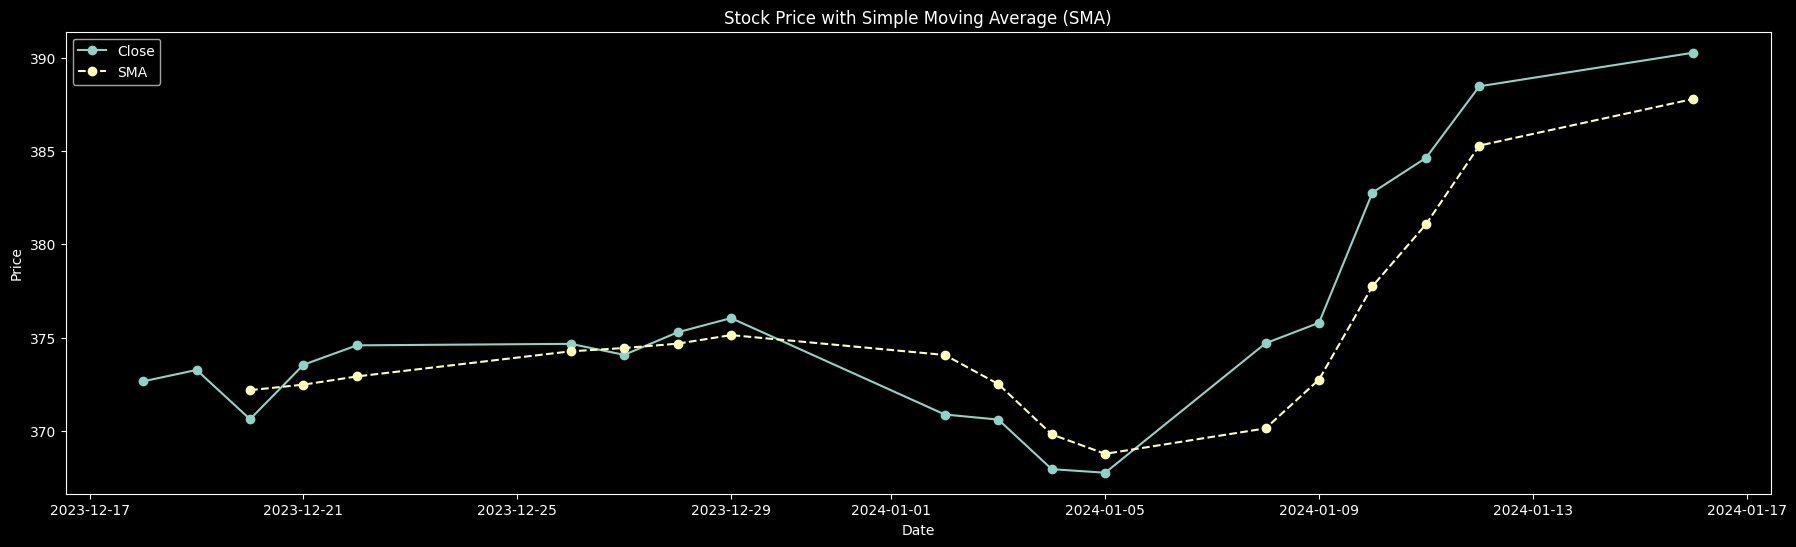

In [24]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index, msft['mySMA'], label='SMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### EMA

In [25]:
def calculateEMA(close_prices, sma_values, smooth,atr_data[i] = sum_true_range / (i - (i - window_t + 1) + 1); window_size):
    multiplier = smooth / (window_size + 1)
    ema_values = []

    for i in range(0, window_size - 1):
        ema_values.append(0)

    first = True
    for i in range(window_size - 1, len(close_prices)):
        if first:
            res = close_prices[i] * multiplier + sma_values[i] * (1 - multiplier)
            first = False
        else:
            res = close_prices[i] * multiplier + ema_values[-1] * (1 - multiplier)
        ema_values.append(res)

    return ema_values

smooth_value = 2  # You can adjust this value based on your preference
window_size = 3  # Adjust the window size based on your requirements
msft['EMA'] = ema_values = calculateEMA(msft['Close'], msft['mySMA'], smooth_value, window_size)
msft['myEMA'] = EMA(msft['Close'], msft['mySMA'], window_size, smooth_value)

SyntaxError: invalid syntax (3338099716.py, line 1)

In [ ]:
msft.tail(5)

In [ ]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[3:], msft['myEMA'][3:], label='myEMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### WMA

In [ ]:
def calculateWMA(df_t, numberOfDays_t):
	"""
	@brief	Calculates the weighted moving average

	@params	df_t			This dataframe with the stocks data
			numberOfDays	the period of days to calculate
							the average
	
	@returns	a list containing the calculated WMA
	"""
	WMA = []
	weight = 0
	for i in range(1, numberOfDays_t+1):
		weight += i
	for i in range(0, numberOfDays_t-1):
		WMA.append(0)
	for i in range(numberOfDays_t, len(df_t.Close) + 1):
		sum = 0
		counter = 1
		for j in range(i-numberOfDays_t, i):
			sum += df_t.Close[j] * (counter/weight) 
			counter += 1
		WMA.append(sum)
	
	return WMA

msft['WMA'] = calculateWMA(msft, window_size)
msft['myWMA'] = WMA(msft['Close'], window_size)

In [ ]:
print(msft.head(10))

In [ ]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[3:], msft['myWMA'][3:], label='myWMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## ATR

In [ ]:
def calculate_atr(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))

    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate ATR
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()

    # Drop temporary columns
    data = data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1)

    return data['ATR']
msft['ATR'] = calculate_atr(msft)
msft['myATR'] = ATR(msft['Close'], msft['High'], msft['Low'], 14)

In [ ]:
print(msft.tail(8))

In [26]:
# Plotting
plt.figure(figsize=(22, 5))
# plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[14:], msft['myATR'][14:], label='myATR', linestyle='--', marker='o')
plt.plot(msft.index, msft['ATR'], label='ATR', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

KeyError: 'myATR'

<Figure size 2200x500 with 0 Axes>

### ATR WMA

In [27]:
def atr_wma(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))

    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate Weighted Moving Average (WMA) of True Range
    data['WMA'] = data['TrueRange'].rolling(window=period).apply(lambda x: (x * range(1, period + 1)).sum() / ((period * (period + 1)) / 2), raw=True)

    # Drop temporary columns
    data = data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1)

    return data['WMA']
msft['ATRwma'] = atr_wma(msft)
msft['myATRwma'] = ATRwma(msft['Close'], msft['High'], msft['Low'], 14)

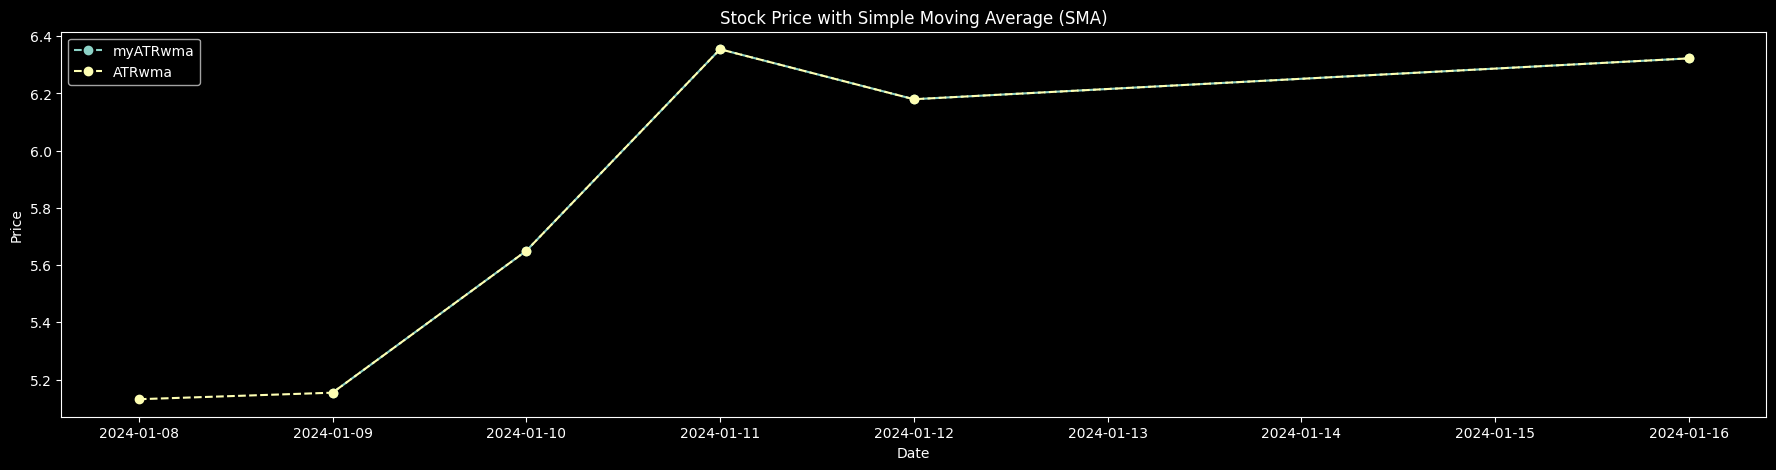

In [28]:
plt.figure(figsize=(22, 5))
# plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[14:], msft['myATRwma'][14:], label='myATRwma', linestyle='--', marker='o')
plt.plot(msft.index, msft['ATRwma'], label='ATRwma', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### ATR EMA

In [29]:
def calculate_atr_ema(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))

    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate ATR with EMA
    data['ATR'] = data['TrueRange'].ewm(span=period, adjust=False, min_periods=period).mean()

    # Drop temporary columns
    data = data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1)

    return data['ATR']
msft['ATRema'] = calculate_atr_ema(msft)
msft['myATRema'] = ATRema(msft['Close'], msft['High'], msft['Low'], 14)

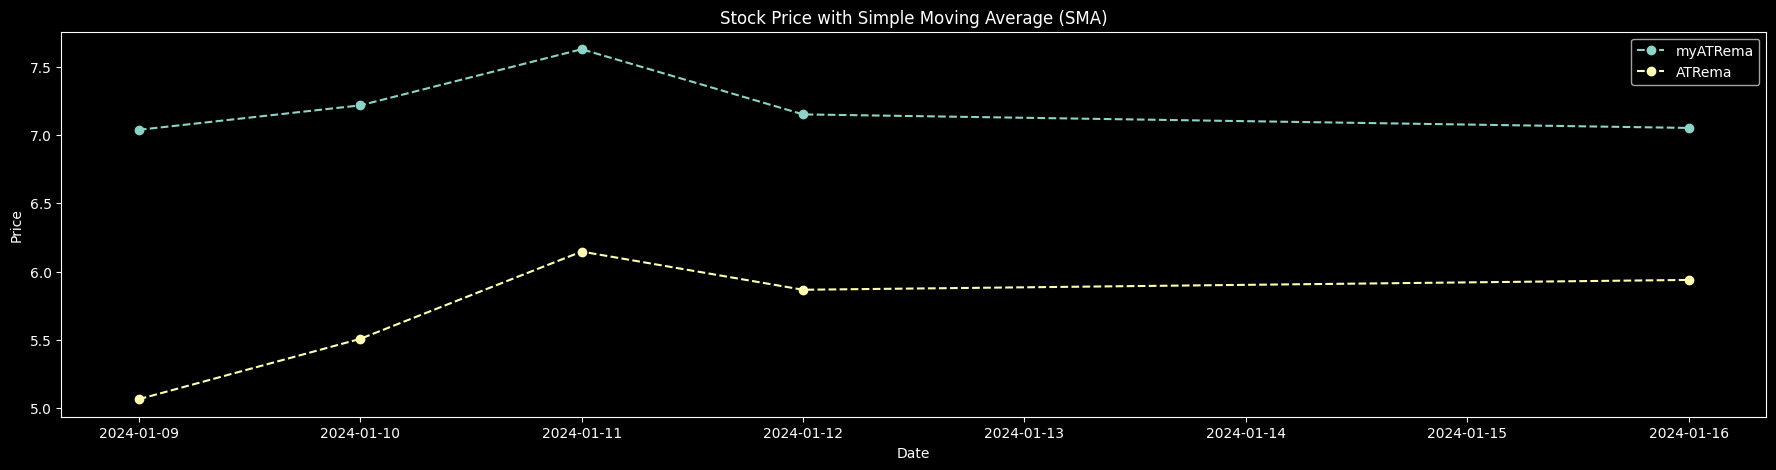

In [30]:
plt.figure(figsize=(22, 5))
# plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[14:], msft['myATRema'][14:], label='myATRema', linestyle='--', marker='o')
plt.plot(msft.index[14:], msft['ATRema'][14:], label='ATRema', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
msft[14:]

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns,SMA,mySMA,High-Low,High-PrevClose,Low-PrevClose,TrueRange,WMA,ATRwma,myATRwma,ATR,ATRema,myATRema
Date,,,,,,,,,,,,,,,,,,,,
2024-01-09,372.010010,375.989990,371.190002,375.790009,375.790009,20830000,0.002936,0.002936,372.743337,372.743337,4.799988,1.299988,3.500000,4.799988,5.154380,5.154380,5.154380,5.065771,5.065771,7.038024
2024-01-10,376.369995,384.170013,376.320007,382.769989,382.769989,25514200,0.018574,0.018574,377.750000,377.750000,7.850006,8.380005,0.529999,8.380005,5.650000,5.650000,5.650000,5.507669,5.507669,7.216955
2024-01-11,386.000000,390.679993,380.380005,384.630005,384.630005,27850800,0.004859,0.004859,381.063334,381.063334,10.299988,7.910004,2.389984,10.299988,6.354379,6.354379,6.354379,6.146645,6.146645,7.628026
2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700,0.009984,0.009984,385.289998,385.289998,4.029999,4.049988,0.019989,4.049988,6.179711,6.179711,6.179711,5.867091,5.867091,7.150954
2024-01-16,393.660004,394.029999,387.622894,390.269989,390.269989,27135918,0.000000,0.004634,387.789998,387.789998,6.407104,5.559998,0.847107,6.407104,6.322373,6.322373,6.322373,5.939092,5.939092,7.051774
